# DSI@SwapHacks: Data Science with Pokemon 

## Introduction
This is a very condensed workshop that will teach you the process of analyzing and visualizing data and applying machine learning to solve problems. The goal is to show the thought process of a data scientist and the tools associated with it. We have some Pokemon to assist us in our efforts. <br><br>If you need help with setup please ask one of the helpers to assist.<br><br> You do not need to use Jupyter Notebook if you don't want to. We do recommend using the notebook since it is a very widely used tool by data scientists. However for other options you can use a .py file and text editor like Sublime or Atom and use <code>python3 [filename].py</code> in terminal or run the commands in the python shell if you know how to.<br><br> I will provide a link to the complete code.

### Importing Modules

In [2]:
import pandas as pd                # Used for data analysis
import matplotlib.pyplot as plt    # Used for assisting visualizations
import seaborn as sns              # Main visualization library

##### For Python 2 users. Uncomment and run this next block. 

In [3]:
# from __future__ import absolute_import, division, print_function

### Seaborn setup

**Mac/Linux Terminal:** <code>pip3 install seaborn</code><br>
**Windows (Through Anaconda Prompt):** <code>pip3 install seaborn</code>

If you have trouble later. You will need to do the following in the same location:
<code>pip3 remove seaborn && pip3 install seaborn==0.9.0</code>


scikit-learn is included in anaconda distributions but if you run into an error saying its not there please run this in terminal <code>pip install -U scikit-learn</code>

In [4]:
# My personal style preferences
sns.set(style = 'darkgrid', color_codes = True) 


# This is used as a hack in Jupyter Notebook to make seaborn plots bigger. Call before making a plot.
def setplt(x = 15, y = 9):
    f, ax = plt.subplots(figsize=(x, y))
    sns.despine(f, left=True, bottom=True)

**Reading in the CSV** (Make sure you have a link to csv or the csv is in your directory)

In [5]:
# This should work since Pokemon.csv is in the same directory as this file

# Print out the first few lines of data to make sure it's working


#### Ask yourself some questions about the data

What are the different types of pokemon?

What is the disbtribution of each type of pokemon? Lets **see** this.

In [6]:
# Here we use a countplot in seaborn.
# Call this function before plotting in seaborn


Lets see some statistics in a more whole sense.

Lets visualize this.

Does a Pokemon's Attack have any relationship to its Defense? Does the type of pokemon matter at all? 

Is there a relationship between HP and Attack abilities. Does it matter if they are legendary?

Lets look at the distribution of HP

Lets make a subset of the data for only Legendary pokemon

Any difference in Attack and Defense overall?

Now to the question that everyone is asking...   
### Groudon vs. Kyogre

Lets see the info for Groudon and Kyogre

In [36]:
import numpy as np
labels = np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])  # We just need to look at these

groudon = useful_data.loc[423,labels].values      # Collecting the data for groudon using numpy for format it
groudon = np.concatenate((groudon, [groudon[0]]))

kyogre = useful_data.loc[421,labels].values
kyogre = np.concatenate((kyogre, [kyogre[0]]))    # Collecting the data for kyogre using numpy for format it

angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)  # Creating set points for angles given labels
angles = np.concatenate((angles, [angles[0]]))


Lets make a Radar Plot

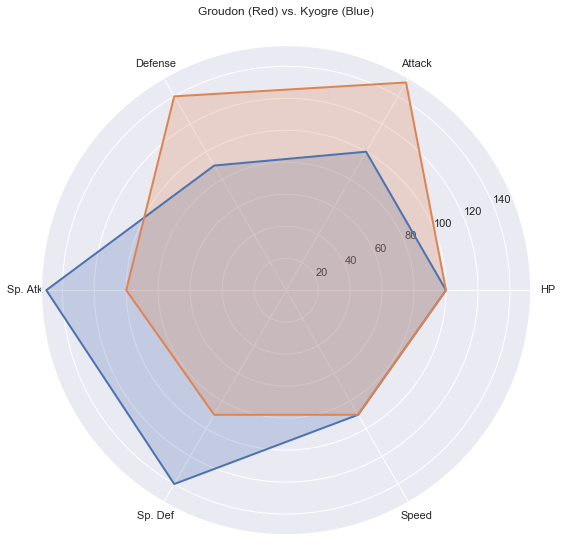

In [37]:
# Creating figure
fig = plt.figure(figsize = (9,9))
rplt = fig.add_subplot(111, polar = True)

# Adding kyogre
rplt.plot(angles, kyogre, linewidth = 2)
rplt.fill(angles, kyogre, alpha = 0.25)

# Adding Groudon
rplt.plot(angles, groudon, linewidth = 2)
rplt.fill(angles, groudon, alpha = 0.25)

# Adding labels and aesthitics
rplt.set_thetagrids(angles*180/np.pi, labels)
rplt.set_title("Groudon (Red) vs. Kyogre (Blue)")
rplt.grid(True)

**WOW**

There doesn't seem to be a clear winner. I guess we will never know  :(

## Legendary Predictor
Building an ML model to see whether or not a pokemon is legendary. This is a simple task since we can easily train machines to detect the higher stats of legendary pokemon, but this will show you the process of implementing an ML model using python

### Looking at Legendary

In [7]:
# Looking to see if we have enough data for legendary pokemon


#### Looking more in depth with boxenplots

In [9]:
# Setting up subplots


# Plotting 



Seems that there is a distinct difference in each of the attributes for legendary pokemon so we might be able to make a predictor for legendary pokemon

### Formatting Data

In [11]:
# Don't need these columns




# Using the Train-Test-Split Model


### Using K-Nearest-Neighbor (KNN) Model

In [12]:
# Import classifier


# Initialize classifier


# Training model


# Testing model



#### Looking for best k-value

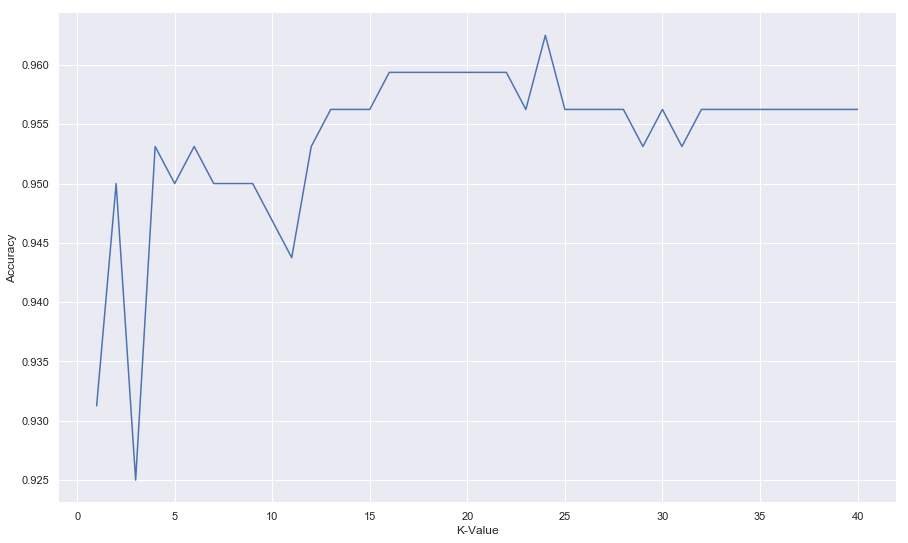

In [54]:
k_scores = []
k_range = range(1,41)
for x in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(features_train, targets_train)
    k_scores.append(knn.score(features_test, targets_test))

d = {"K-Value": k_range, "Accuracy": k_scores}
df = pd.DataFrame(data = d)

setplt()
check_k = sns.lineplot(x = "K-Value", y = "Accuracy", data = df)

In [13]:
# Using k = peak


#### Testing whole set

### Using Random Forest

#### Testing whole set

Hey that's pretty good! We can now use this Random Forest ML model to predict whether pokemon is legenday with a 98% accuracy